# Answers to key business questions from Instacart

## Table of Contents
1. Import libraries & Dataframe(s)
2. Address PII(Personally Identifiable Information) data in imported data
3. ### Regional segmentation 
   - Create regional segmentation of the data
   - Using Wikipedia article information for the creation of regional segmentation new column
   - Determining the difference in spending habits between the different U.S Regions
4. ### Create an exclusion flag for low-activity customers
5. ### Customer profiling
   - Create profiling variables based on 'age', 'income' and 'number of dependents'
6. ### Visualizations of profiles distribution
   - Create visualizations based on step 5
7. ### Aggregate the max, mean and min variables on a customer-profile level for usage frequency and expenditure
8. ### Comparison of customer profiles with regions and departments
9. ### Visualizations illustrating results
    - Bar charts
    - Histograms
    - pie Charts
10. ### Export final data set

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Creating path
path = r'C:\Users\terry\Documents\Data Analytics Course\Achievement 4\23-11-2024 Instacart Basket Analysis'

In [4]:
# Importing dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

## 2. Addressing PII data in imported data

In [5]:
# Displaying all columns toidentify possible PII data
pd.set_option('display.max_columns', None)

In [6]:
df.head(1)

,order_id,user_id,number_of_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


This data set poses security concerns because customers can be easily identified. The combination of the columns; first_name, last_name, age, gender and even state makes it very easy for a customer to be identifiable. Taking out the first_name and last_name columns will address the PII issues but for the sake of this task which i have not been expressly asked to delete data that raise security concerns and since i won't be forwarding the results of my analysis to any company, i won't be dropping the 'names' columns. 

## 3. Regional segmentation

#### 3.1 Creating regional segmentation of the data

In [7]:
# Creating 'region' column values
result = []
for value in df['state']:
    if value in ('Maine' 'New Hampshire' 'Vermont' 'Massachusetts' 'Rhode Island' 'Connecticut' 'New York' 'Pennsylvania' 'New Jersey'):
        result.append('Northeast')
    elif value in ('Wisconsin' 'Michigan' 'Illinois' 'Indiana' 'Ohio' 'North Dakota' 'South Dakota' 'Nebraska' 'Kansas' 'Minnesota' 'Iowa' 'Missouri'):
        result.append('Midwest')
    elif value in ('Delaware' 'Maryland' 'District of Columbia' 'Virginia' 'West Virginia' 'North Carolina' 'South Carolina' 'Georgia' 'Florida' 'Kentucky'
                   'Tennessee' 'Mississippi' 'Alabama' 'Oklahoma' 'Texas' 'Arkansas' 'Louisiana'):
        result.append('South')
    elif value in ('Idaho' 'Montana' 'Wyoming' 'Nevada' 'Utah' 'Colorado' 'Arizona' 'New Mexico' 'Alaska' 'Washington' 'Oregon' 'California' 'Hawaii'):
        result.append('West')
    else : 
        result.append('NA')

In [8]:
# Creating 'region' column and inserting values
df['region'] = result

In [9]:
# Checking dataframe with new region column
df.head()

,order_id,user_id,number_of_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [10]:
# Checking total counts by regions
df['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

#### 3.2 Determining spending habits difference between the different U.S regions

In [11]:
# redefining spender_flag
df['average_spend'] = df.groupby(['user_id'])['prices'].transform(np.mean)

C:\Users\terry\AppData\Local\Temp\ipykernel_11744\908224001.py:2: FutureWarning: The provided callable <function mean at 0x000001F2F9ED77E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df['average_spend'] = df.groupby(['user_id'])['prices'].transform(np.mean)


In [12]:
# Creating flag for high and low spender
df.loc[df['average_spend']<10, 'spender_flag'] = 'Low_spender'
df.loc[df['average_spend']>=10, 'spender_flag'] = 'High_spender'

In [13]:
# Checking spender flags
df['spender_flag'].value_counts(dropna = False)

spender_flag
Low_spender     32285150
High_spender      119709
Name: count, dtype: int64

In [14]:
df.head(1)

,order_id,user_id,number_of_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [57]:
# Crossing the 'region' variable with the 'Spending flag'
crosstab = pd.crosstab(df['region'], df['spender_flag'], dropna = False)

In [ ]:
crosstab.to_clipboard()

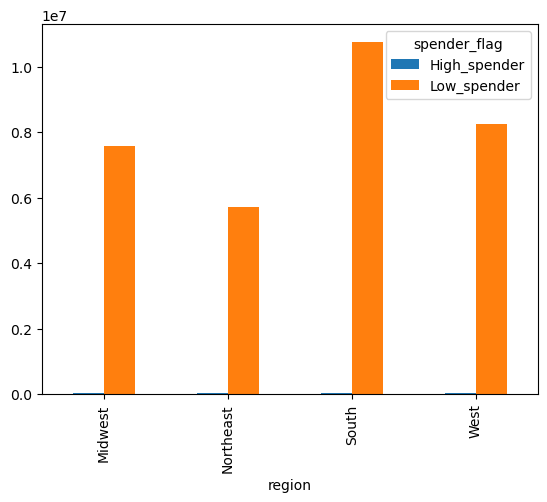

In [58]:
# Bar chart of spending habits across U.S regions
bar_spend_regions = crosstab.plot.bar()

In [ ]:
print(crosstab)

All regions have considerably more lower spenders than higher spenders

In [ ]:
# Exporting Bar Chart
bar_spend_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regions_spending_habits.png'))

## 4. Create an exclusion flag for low-activity customers

In [15]:
# Creating a flag for customers with less than 5 orders
df.loc[df['max_order'] < 5, 'activity_flag'] = 'Less active customer'
df.loc[df['max_order'] >= 5, 'activity_flag'] = 'active customer'

In [16]:
# Checking activity_flag counts
df['activity_flag'].value_counts(dropna = False)

activity_flag
active customer         30964564
Less active customer     1440295
Name: count, dtype: int64

In [17]:
# checking df with activity flag column
df.head(1)

,order_id,user_id,number_of_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer


In [53]:
# Crossing max order variable with activity flag
crosstab_2 = pd.crosstab(df['max_order'], df['activity_flag'], dropna = False)

In [ ]:
crosstab_2.to_clipboard()

In [18]:
# Excluding customers with orders less than 5
df_new = df[df['activity_flag'] != 'Less active customer']

In [55]:
# crossing max order variable with activity flag using new dataframe without Less active customers
crosstab_3 = pd.crosstab(df_new['max_order'], df_new['activity_flag'], dropna = False)

In [ ]:
crosstab_3.to_clipboard()

Verifying activity flag before and after exclusion of customers with less than 5 orders. Excel screenshots uploaded in Visualizations folder. I could drop the activity flag column since all customers are now active but for verifications purposes to ensure that all customers are active, i won't be doing that.

In [ ]:
# Exporting new dataframe
df_new.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_new_lessactive_excl..pkl')) 

## 5. Customer profiling variables

#### 5.1 Creating customers' age variable 

In [19]:
# Creating age variable in different age groups
df.loc[df['age'] <= 20, 'age_group'] = 'Young'
df.loc[(df['age'] > 20) & (df['age'] <= 30), 'age_group'] = 'Young Adult'
df.loc[(df['age'] > 30) & (df['age'] <= 50), 'age_group'] = 'Adult'
df.loc[(df['age'] > 50) & (df['age'] <= 65), 'age_group'] = 'Older Adult'
df.loc[df['age'] > 65, 'age_group'] = 'Senior'

In [20]:
# Checking dataframe with age group column
df.head()

,order_id,user_id,number_of_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag,age_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult


In [21]:
age_group = df['age_group'].value_counts(dropna = False)

In [22]:
# Checking dataframe age group counts
df['age_group'].value_counts()

age_group
Adult          10162866
Senior          8088101
Older Adult     7554533
Young Adult     5076431
Young           1522928
Name: count, dtype: int64

#### 5.2 Creating Customers' income group variable

In [23]:
# Creating income_group profiling variable
df.loc[df['income'] <= 100000, 'income_group'] = 'Low income'
df.loc[(df['income'] > 100000) & (df['income'] <= 200000), 'income_group'] = 'Middle income'
df.loc[df['income'] > 200000, 'income_group'] = 'High income'

In [25]:
df.head()

,order_id,user_id,number_of_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag,age_group,income_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult,Low income
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult,Low income
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult,Low income
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult,Low income
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult,Low income


In [26]:
income_group_counts = df['income_group'].value_counts(dropna = False)

In [27]:
df['income_group'].value_counts()

income_group
Low income       17590657
Middle income    14555759
High income        258443
Name: count, dtype: int64

#### 5.3 Creating Number of dependents variable

In [28]:
df.loc[df['number_of_dependents'] == 0, 'dependents_flag'] = 'No dependents'
df.loc[df['number_of_dependents'] > 0, 'dependents_flag'] = 'Dependents'

In [29]:
dependents_counts = df['dependents_flag'].value_counts(dropna = False)

In [30]:
# Checking dependents flag counts
df['dependents_flag'].value_counts(dropna = False)

dependents_flag
Dependents       24307356
No dependents     8097503
Name: count, dtype: int64

In [32]:
# Checking dataframe with dependents_flag column
df.head()

,order_id,user_id,number_of_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag,age_group,income_group,dependents_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult,Low income,Dependents
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult,Low income,Dependents
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult,Low income,Dependents
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult,Low income,Dependents
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult,Low income,Dependents


Exporting dataframe with added columns

In [33]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_task4_10_1.pkl'))

### 6. Visualizations to illustrate distribution of customer profiles


####     - 6.1 Age Groups distribution - pie chart

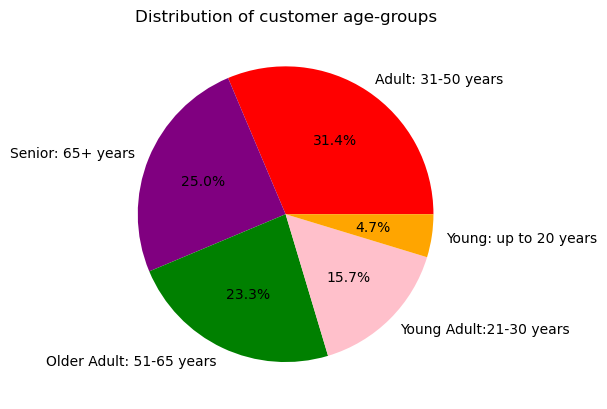

In [71]:
# Creating a pie chart to illustrate the distribution of customer age groups
age_group_pie = age_group.plot.pie(autopct='%1.1f%%', labels = ['Adult: 31-50 years', 'Senior: 65+ years', 'Older Adult: 51-65 years', 
                                                                'Young Adult:21-30 years',  'Young: up to 20 years'],

                                                               colors = ['red', 'purple', 'green', 'pink', 'orange'])
plt.ylabel('') #y-axis label hidden
plt.title('Distribution of customer age-groups')
plt.show()
                                   

In [72]:
# Exporting age_group pie Chart
age_group_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_distr.png'))

#### Age groups distribution - bar chart 

Text(0.5, 1.0, 'Distribution of customer age-groups')

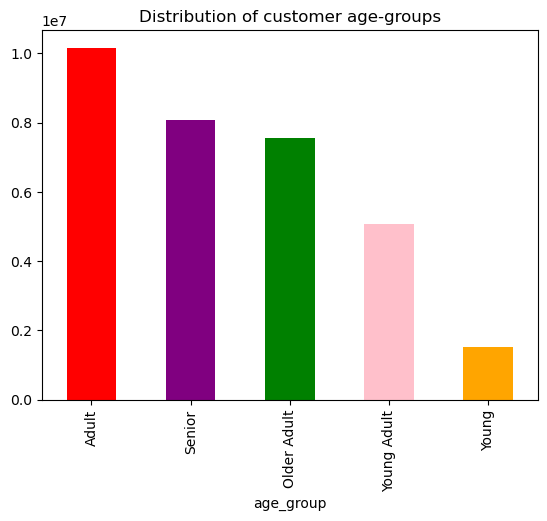

In [73]:
bar_age_group = df['age_group'].value_counts().plot.bar(color = ['red', 'purple', 'green', 'pink', 'orange'])
plt.title('Distribution of customer age-groups')

In [74]:
# Exporting age-group bar chart
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_distr_bar.png'))

#### 6.2 Income groups distribution - pie chart

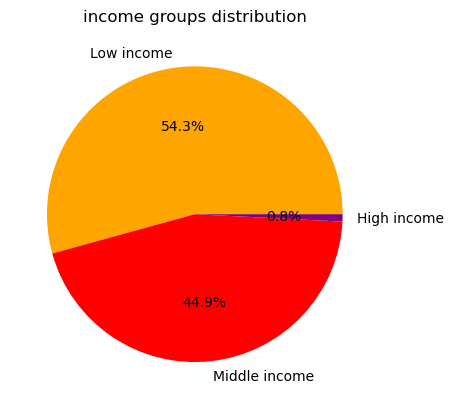

In [75]:
# Creating income groups distribution pie chart
income_group_pie = income_group_counts.plot.pie(autopct='%1.1f%%', colors = ['orange', 'red', 'purple'])
plt.title('income groups distribution')
plt.ylabel('')
plt.show()

In [ ]:
# Exporting income groups distribution pie chart
income_group_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_dist_pie.png'))

#### Income groups distribution - bar chart

Text(0.5, 1.0, 'Income groups distribution')

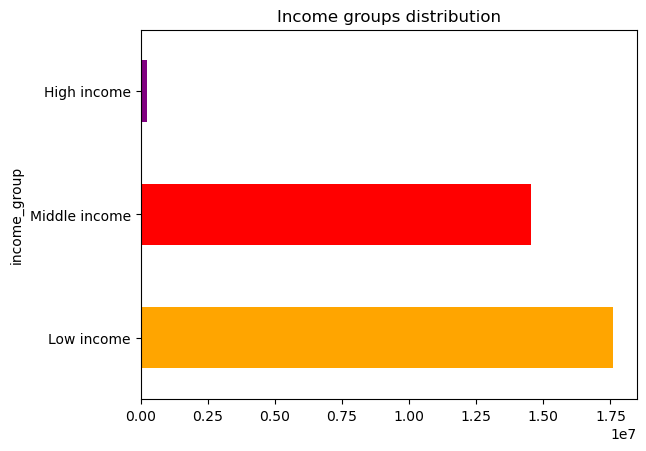

In [76]:
# Creating income group distribution bar chart
bar_income_group = df['income_group'].value_counts().plot.barh(color = ['orange', 'red', 'purple'])
plt.title('Income groups distribution')

In [ ]:
# Exporting income groups distribution bar chart
bar_income_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_dist_bar.png'))

#### 6.3 Customers with dependents - pie chart

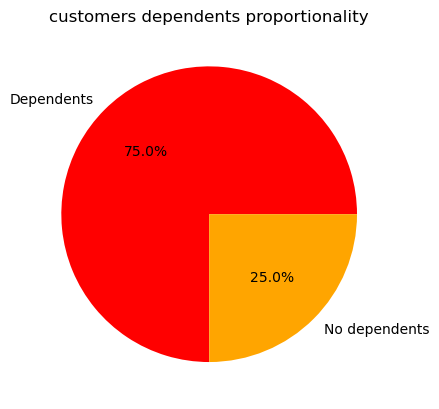

In [77]:
# Creating customers with dependents proportionality pie chart
dependents_pie = dependents_counts.plot.pie(autopct='%1.1f%%', colors = ['red', 'orange'])
plt.title('customers dependents proportionality')
plt.ylabel('')
plt.show()


In [ ]:
# Exporting customers dependents pie chart
dependents_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependents_pie_dist.png'))

#### customers with dependents - bar chart

Text(0.5, 1.0, 'Customers with dependents')

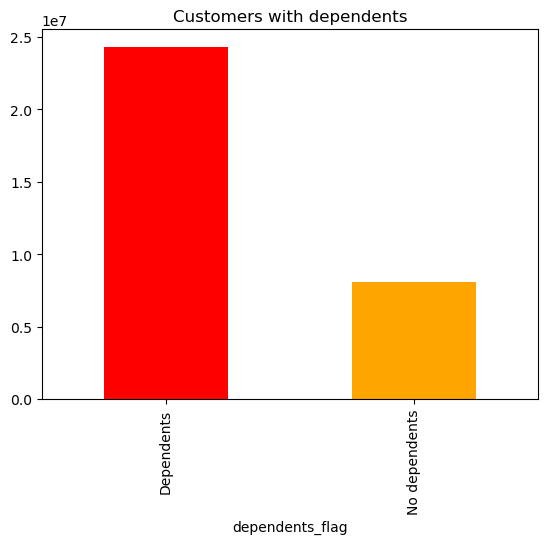

In [78]:
# Creating customers with dependents bar chart
dependents_bar = df['dependents_flag'].value_counts().plot.bar(color = ['red', 'orange'])
plt.title('Customers with dependents')

In [ ]:
# Exporting customer with dependents bar chart
dependents_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_dep_bar.png'))

### 7. Aggregate Statistics variables on a customer-profile level for usage frequency and expenditure

#### 7.1 Customer profile-level for usage frequency statistics

In [79]:
# Aggregating statistics variables of customer-profile usage frequency
# Aggregating 'number_of_order' and 'days_since_prior_order' grouped by 'user_id' to determine usage frequency
usage_freq_agg = df.groupby('user_id').agg({'number_of_order':['max', 'min', 'mean'], 'days_since_prior_order':['max', 'min', 'mean']})

In [80]:
# Calling up customer usage frequency stats
usage_freq_agg

number_of_order                days_since_prior_order                 
                    max min       mean                    max   min       mean
user_id                                                                       
1                    10   1   5.813559                   30.0   0.0  20.259259
2                    14   1   8.035897                   30.0   3.0  15.967033
3                    12   1   6.000000                   21.0   7.0  11.487179
4                     5   1   2.888889                   21.0   0.0  15.357143
5                     4   1   2.486486                   19.0  10.0  14.500000
...                 ...  ..        ...                    ...   ...        ...
206205                3   1   1.687500                   30.0  10.0  20.666667
206206               67   1  38.007018                   15.0   0.0   4.042705
206207               16   1   8.116592                   30.0   1.0  14.879397
206208               49   1  25.505170                   20.0   0.0   7.442105
206209               13   1   6.937984                   30.0   3.0  20.275862

[206209 rows x 6 columns]

#### 7.2 customer profile-level for expenditure statistics

In [81]:
# Aggregating variables for customer profile on expenditure
# aggregating 'number_of_order and 'prices' grouped by 'user_id' to determine statistics on customer expenditure
exp_customer_agg = df.groupby('user_id').agg({'number_of_order':['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [82]:
# Calling up customer expenditure stats
exp_customer_agg

number_of_order                prices               
                    max min       mean    max  min      mean
user_id                                                     
1                    10   1   5.813559   14.0  1.0  6.367797
2                    14   1   8.035897   14.8  1.3  7.515897
3                    12   1   6.000000   14.4  1.3  8.197727
4                     5   1   2.888889   14.6  1.4  8.205556
5                     4   1   2.486486   14.8  3.2  9.189189
...                 ...  ..        ...    ...  ...       ...
206205                3   1   1.687500   23.8  1.4  8.909375
206206               67   1  38.007018   14.8  1.1  7.646667
206207               16   1   8.116592   24.7  1.2  7.313453
206208               49   1  25.505170   21.6  1.1  8.366617
206209               13   1   6.937984   18.8  1.1  7.058915

[206209 rows x 6 columns]

Please note: After having replaced the outlier 'prices' values of 14900.0 and 99999.0 with the mean of 7.1 in my previously prepared data which as a result limited the maximum amount spent per item to 25.0, and looking at the 'max' prices in the statistics, it is fair to say the statistics are reflective of the data at hand. 

### Due to lack of computer resources, this task continues in a new notebook